In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [5]:
def resident(x, t):
    lambda1 = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lambda1*x[0]
    i1dot = sigmaS*lambda1*x[0] - (mu+alpha1+(sigmaI*lambda1))*x[1]
    d11dot = sigmaI*lambda1*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [6]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))

In [7]:
tmax2 = 1000
ts2 = np.linspace(0,100,tmax2)

In [8]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[999]
I1=I1s[999]
D11=D11s[999]

In [9]:
def fitnessgrad():
    lambdam=(betam*(I1+D11))
    alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
    alphamd = 0.157*np.exp(0.2*(betam - 0.75)/0.157)
    dr = sigmaS*S*(((mu+alpham+(sigmaI*lambdam)-(betam*alphamd))/(mu+alpham+(sigmaI*lambdam))**2)+(((sigmaI*lambdam)/(mu+alpham+(sigmaI*lambdam)))*(((mu+alpham-(betam*alphamd))/(mu+alpham)**2)-(((betam*alphamd)/(mu+alpham))/(mu+alpham+(sigmaI*lambdam)))))) + sigmaI*I1*((mu+alpham-(betam*alphamd))/(mu+alpham)**2)
    return dr 

# $\mu$

In [34]:
muvals = np.around(np.arange(start=0, stop=0.051, step=0.001),decimals=3)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)
singstratmu=[]

In [35]:
for i in muvals:
    mu = i 
    for j in betamvals:
        betam = j 
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[999]
        I1=I1s[999]
        D11=D11s[999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.0001))/2
            print("mu=",mu,"beta=",sings)
            singstratmu.append(sings)
            break

mu= 0.0 beta= 0.60745
mu= 0.001 beta= 0.61715
mu= 0.002 beta= 0.62665
mu= 0.003 beta= 0.63585
mu= 0.004 beta= 0.64485
mu= 0.005 beta= 0.65365
mu= 0.006 beta= 0.66215
mu= 0.007 beta= 0.67055
mu= 0.008 beta= 0.67865
mu= 0.009 beta= 0.68665
mu= 0.01 beta= 0.69445
mu= 0.011 beta= 0.70205
mu= 0.012 beta= 0.70955
mu= 0.013 beta= 0.71695
mu= 0.014 beta= 0.72415
mu= 0.015 beta= 0.73125
mu= 0.016 beta= 0.73815
mu= 0.017 beta= 0.74495
mu= 0.018 beta= 0.75165
mu= 0.019 beta= 0.75825
mu= 0.02 beta= 0.76475
mu= 0.021 beta= 0.77105
mu= 0.022 beta= 0.77735
mu= 0.023 beta= 0.78355
mu= 0.024 beta= 0.78955
mu= 0.025 beta= 0.79555
mu= 0.026 beta= 0.80145
mu= 0.027 beta= 0.80725
mu= 0.028 beta= 0.81295
mu= 0.029 beta= 0.81855
mu= 0.03 beta= 0.82415
mu= 0.031 beta= 0.82965
mu= 0.032 beta= 0.83505
mu= 0.033 beta= 0.84035
mu= 0.034 beta= 0.84565
mu= 0.035 beta= 0.85085
mu= 0.036 beta= 0.85595
mu= 0.037 beta= 0.86105
mu= 0.038 beta= 0.86605
mu= 0.039 beta= 0.87105
mu= 0.04 beta= 0.87595
mu= 0.041 beta= 0.8807

(0.6, 1.0)

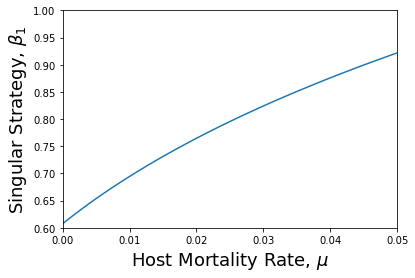

In [38]:
plt.plot(muvals,singstratmu)
plt.xlabel(r'Host Mortality Rate, $\mu$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0, 0.05) # in  maple first value of mu used is 0.005. limiting x-axis to this range
plt.ylim(0.6,1) 

# $\rho$

In [10]:
mu=0.02
rhovals = np.around(np.arange(start=0, stop=0.051, step=0.001),decimals=3)
betamvals = np.around(np.arange(start=0, stop=1.001, step=0.001),decimals=3)
singstratrho=[]

In [11]:
for i in rhovals:
    rho = i 
    for j in betamvals:
        betam = j 
             
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[999]
        I1=I1s[999]
        D11=D11s[999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("rho=",rho,"beta=",sings)
            singstratrho.append(sings)
            break 

rho= 0.0 beta= 0.7645
rho= 0.001 beta= 0.7645
rho= 0.002 beta= 0.7645
rho= 0.003 beta= 0.7645
rho= 0.004 beta= 0.7645
rho= 0.005 beta= 0.7645
rho= 0.006 beta= 0.7645
rho= 0.007 beta= 0.7645
rho= 0.008 beta= 0.7645
rho= 0.009 beta= 0.7645
rho= 0.01 beta= 0.7645
rho= 0.011 beta= 0.7645
rho= 0.012 beta= 0.7645
rho= 0.013 beta= 0.7645
rho= 0.014 beta= 0.7645
rho= 0.015 beta= 0.7645
rho= 0.016 beta= 0.7645
rho= 0.017 beta= 0.7645
rho= 0.018 beta= 0.7645
rho= 0.019 beta= 0.7645
rho= 0.02 beta= 0.7645
rho= 0.021 beta= 0.7645
rho= 0.022 beta= 0.7645
rho= 0.023 beta= 0.7645
rho= 0.024 beta= 0.7645
rho= 0.025 beta= 0.7645
rho= 0.026 beta= 0.7645
rho= 0.027 beta= 0.7645
rho= 0.028 beta= 0.7645
rho= 0.029 beta= 0.7645
rho= 0.03 beta= 0.7645
rho= 0.031 beta= 0.7645
rho= 0.032 beta= 0.7645
rho= 0.033 beta= 0.7645
rho= 0.034 beta= 0.7645
rho= 0.035 beta= 0.7645
rho= 0.036 beta= 0.7645
rho= 0.037 beta= 0.7645
rho= 0.038 beta= 0.7645
rho= 0.039 beta= 0.7645
rho= 0.04 beta= 0.7645
rho= 0.041 beta= 0.764

(0.6, 1.0)

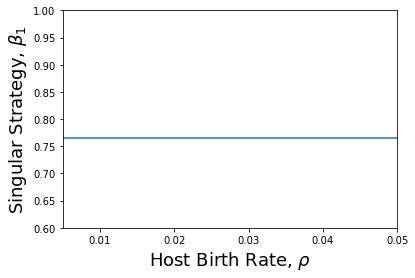

In [12]:
plt.plot(rhovals,singstratrho)
plt.xlabel(r'Host Birth Rate, $\rho$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.005,0.05) # in  maple first value of rho used is 0.005. limiting x-axis to this range
plt.ylim(0.6,1) 

# $\sigma_S$

In [19]:
rho=0.02
sigmaSvals = np.around(np.arange(start=0, stop=10.1, step=0.1),decimals=1)
betamvals = np.around(np.arange(start=0, stop=1.001, step=0.001),decimals=3)
singstratss=[]

In [20]:
for i in sigmaSvals:
    sigmaS = i 
    for j in betamvals:
        betam = j 
             
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[999]
        I1=I1s[999]
        D11=D11s[999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("sigmaS=",sigmaS,"beta=",sings)
            singstratss.append(sings)
            break 

sigmaS= 0.0 beta= 0.7645
sigmaS= 0.1 beta= 0.7645
sigmaS= 0.2 beta= 0.7645
sigmaS= 0.3 beta= 0.7645
sigmaS= 0.4 beta= 0.7645
sigmaS= 0.5 beta= 0.7645
sigmaS= 0.6 beta= 0.7645
sigmaS= 0.7 beta= 0.7645
sigmaS= 0.8 beta= 0.7645
sigmaS= 0.9 beta= 0.7645
sigmaS= 1.0 beta= 0.7645
sigmaS= 1.1 beta= 0.7645
sigmaS= 1.2 beta= 0.7645
sigmaS= 1.3 beta= 0.7645
sigmaS= 1.4 beta= 0.7645
sigmaS= 1.5 beta= 0.7645
sigmaS= 1.6 beta= 0.7645
sigmaS= 1.7 beta= 0.7645
sigmaS= 1.8 beta= 0.7645
sigmaS= 1.9 beta= 0.7645
sigmaS= 2.0 beta= 0.7645
sigmaS= 2.1 beta= 0.7645
sigmaS= 2.2 beta= 0.7645
sigmaS= 2.3 beta= 0.7645
sigmaS= 2.4 beta= 0.7645
sigmaS= 2.5 beta= 0.7645
sigmaS= 2.6 beta= 0.7645
sigmaS= 2.7 beta= 0.7645
sigmaS= 2.8 beta= 0.7645
sigmaS= 2.9 beta= 0.7645
sigmaS= 3.0 beta= 0.7645
sigmaS= 3.1 beta= 0.7645
sigmaS= 3.2 beta= 0.7645
sigmaS= 3.3 beta= 0.7645
sigmaS= 3.4 beta= 0.7645
sigmaS= 3.5 beta= 0.7645
sigmaS= 3.6 beta= 0.7645
sigmaS= 3.7 beta= 0.7645
sigmaS= 3.8 beta= 0.7645
sigmaS= 3.9 beta= 0.7645


(0.6, 1.0)

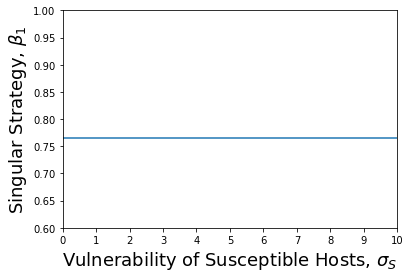

In [43]:
positions = (0,1,2,3,4,5,6,7,8,9,10)
plt.xticks(positions)
plt.plot(sigmaSvals,singstratss)
plt.xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0,10)
plt.ylim(0.6,1)

# $\sigma_I$

In [22]:
sigmaS=1
sigmaIvals = np.around(np.arange(start=0, stop=10.1, step=0.1),decimals=1)
betamvals = np.around(np.arange(start=0, stop=1.001, step=0.001),decimals=3)
singstratsi=[]

In [23]:
for i in sigmaIvals:
    sigmaI = i 
    for j in betamvals:
        betam = j 
             
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[999]
        I1=I1s[999]
        D11=D11s[999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("sigmaI=",sigmaI,"beta=",sings)
            singstratsi.append(sings)
            break 

sigmaI= 0.0 beta= 0.7645
sigmaI= 0.1 beta= 0.7645
sigmaI= 0.2 beta= 0.7645
sigmaI= 0.3 beta= 0.7645
sigmaI= 0.4 beta= 0.7645
sigmaI= 0.5 beta= 0.7645
sigmaI= 0.6 beta= 0.7645
sigmaI= 0.7 beta= 0.7645
sigmaI= 0.8 beta= 0.7645
sigmaI= 0.9 beta= 0.7645
sigmaI= 1.0 beta= 0.7645
sigmaI= 1.1 beta= 0.7645
sigmaI= 1.2 beta= 0.7645
sigmaI= 1.3 beta= 0.7645
sigmaI= 1.4 beta= 0.7645
sigmaI= 1.5 beta= 0.7645
sigmaI= 1.6 beta= 0.7645
sigmaI= 1.7 beta= 0.7645
sigmaI= 1.8 beta= 0.7645
sigmaI= 1.9 beta= 0.7645
sigmaI= 2.0 beta= 0.7645
sigmaI= 2.1 beta= 0.7645
sigmaI= 2.2 beta= 0.7645
sigmaI= 2.3 beta= 0.7645
sigmaI= 2.4 beta= 0.7645
sigmaI= 2.5 beta= 0.7645
sigmaI= 2.6 beta= 0.7645
sigmaI= 2.7 beta= 0.7645
sigmaI= 2.8 beta= 0.7645
sigmaI= 2.9 beta= 0.7645
sigmaI= 3.0 beta= 0.7645
sigmaI= 3.1 beta= 0.7645
sigmaI= 3.2 beta= 0.7645
sigmaI= 3.3 beta= 0.7645
sigmaI= 3.4 beta= 0.7645
sigmaI= 3.5 beta= 0.7645
sigmaI= 3.6 beta= 0.7645
sigmaI= 3.7 beta= 0.7645
sigmaI= 3.8 beta= 0.7645
sigmaI= 3.9 beta= 0.7645


(0.6, 1.0)

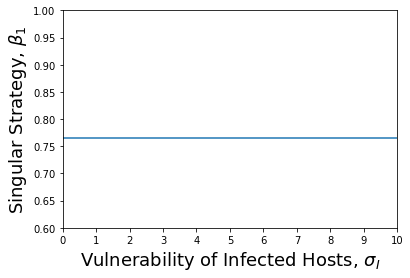

In [42]:
positions = (0,1,2,3,4,5,6,7,8,9,10)
plt.xticks(positions)
plt.plot(sigmaIvals,singstratsi)
plt.xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0,10)
plt.ylim(0.6,1)